In [5]:
import pandas as pd

# Load dataset
file_path = 'E:\Sems 7\SisRek/Tempat-Wisata-Toba-Preprocessing.csv'
data = pd.read_csv(file_path)

# Tampilkan 5 baris pertama dataset
data.head()

,Unnamed: 0.1,Unnamed: 0,address,PlaceID,Nama_tempat_wisata,Category,ReviewerId,Rating,Reviews
0,0,0,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.126030e+20,5.0,NaN
1,1,1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.119090e+20,5.0,bagus
2,2,2,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.078860e+20,5.0,NaN
3,3,3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.130720e+20,5.0,sangat menyenagkan
4,4,4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.061730e+20,5.0,bebas foto dimana aja cuma 2k


In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('E:\Sems 7\SisRek/Tempat-Wisata-Toba-Preprocessing.csv')

# Split into train, validation, test (70%, 15%, 15%)
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

#### User profile dan Item profile.

In [26]:
import numpy as np
import pandas as pd


test_data = pd.DataFrame({
    'ReviewerId': [1, 1, 2, 2],
    'PlaceID': [0, 2, 1, 3],
    'Rating': [5, 3, 4, 2]
})

user_profiles = {}

# Misalkan normalized_item_features adalah DataFrame dengan fitur item
normalized_item_features = pd.DataFrame(np.random.rand(10, 5))  # Placeholder, sesuaikan dengan fitur item asli

# Membuat pemetaan PlaceID ke index yang valid (sesuaikan dengan jumlah fitur)
place_id_to_index = {i: i % normalized_item_features.shape[1] for i in range(normalized_item_features.shape[0])}

# Buat profil pengguna dari data rating (misalnya menggunakan rating untuk setiap item)
for user_id in test_data['ReviewerId'].unique():
    user_data = test_data[test_data['ReviewerId'] == user_id]
    user_profile = np.zeros(normalized_item_features.shape[1])
    
    for place_id, rating in zip(user_data['PlaceID'], user_data['Rating']):
        # Map PlaceID ke index yang valid
        feature_index = place_id_to_index[place_id]
        user_profile[feature_index] = rating
    
    user_profiles[user_id] = user_profile

print(user_profiles)

{1: array([5., 0., 3., 0., 0.]), 2: array([0., 4., 0., 2., 0.])}


Pengguna dengan ReviewerId = 1 memberikan rating sebagai berikut:
PlaceID = 0 mendapatkan rating 5 (ada di indeks pertama).
PlaceID = 2 mendapatkan rating 3 (ada di indeks ketiga).
Tempat lainnya (PlaceID = 1, PlaceID = 3, dll) mendapatkan rating 0 (belum diberi rating atau tidak ada).

Pengguna dengan ReviewerId = 2 memberikan rating sebagai berikut:
PlaceID = 1 mendapatkan rating 4 (ada di indeks kedua).
PlaceID = 3 mendapatkan rating 2 (ada di indeks keempat).
Tempat lainnya (PlaceID = 0, PlaceID = 2, dll) mendapatkan rating 0.

In [8]:
import pandas as pd
import numpy as np

# Fungsi untuk menghitung kemiripan (cosine similarity)
from sklearn.metrics.pairwise import cosine_similarity

# Fungsi rekomendasi berdasarkan profil pengguna
def recommend_items(user_id, user_profiles, normalized_item_features, top_n=5):
    user_profile = user_profiles[user_id]  # Ambil profil pengguna
    
    # Hitung kemiripan cosine antara profil pengguna dan fitur item
    similarities = cosine_similarity(user_profile, normalized_item_features)
    
    # Menghasilkan rekomendasi berdasarkan kemiripan tertinggi
    recommendations_idx = similarities.argsort()[0][-top_n:]
    
    # Ambil nama tempat atau item terkait dengan rekomendasi
    recommendations = normalized_item_features.iloc[recommendations_idx]
    recommendations['Similarity'] = similarities[0][recommendations_idx]
    
    return recommendations


##### Membagi data menjadi train, validation, dan test

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


data = pd.DataFrame({
    'ReviewerId': [1, 1, 2, 2, 3, 3, 4, 4],
    'PlaceID': [0, 2, 1, 3, 0, 4, 1, 2],
    'Rating': [5, 3, 4, 2, 5, 4, 3, 2]
})

train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)  # 70% train
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)  # 15% validation, 15% test

# Menampilkan jumlah data
total_data = len(data)
train_count = len(train_data)
validation_count = len(validation_data)
test_count = len(test_data)

print(f"70% (Train): {train_count} dari {total_data} data")
print(f"15% (Validation): {validation_count} dari {total_data} data")
print(f"15% (Test): {test_count} dari {total_data} data\n")

# Menampilkan dataset hasil pembagian
print("Train Data:")
print(train_data)
print("\nValidation Data:")
print(validation_data)
print("\nTest Data:")
print(test_data)


user_profiles = {}

for user_id in train_data['ReviewerId'].unique():
    user_data = train_data[train_data['ReviewerId'] == user_id]
    user_profile = np.zeros(5)  # Misalkan ada 5 fitur (ganti sesuai data Anda)
    for place_id, rating in zip(user_data['PlaceID'], user_data['Rating']):
        user_profile[place_id] = rating
    user_profiles[user_id] = user_profile


user_id = 1
user_profile = user_profiles.get(user_id, np.zeros(5))  # Mengambil profil user atau default 0


normalized_item_features = pd.DataFrame({
    'Feature1': [0.8, 0.6, 0.1, 0.9, 0.4],
    'Feature2': [0.3, 0.2, 0.5, 0.7, 0.6],
    'Feature3': [0.7, 0.8, 0.1, 0.2, 0.4],
    'Feature4': [0.5, 0.3, 0.9, 0.4, 0.7],
    'Feature5': [0.2, 0.4, 0.6, 0.1, 0.5]
})

# Menghitung similarity
cos_similarities = cosine_similarity([user_profile], normalized_item_features)[0]

# Menampilkan rekomendasi
print(f"\nCosine Similarity for User {user_id}: {cos_similarities}")
top_5_places = np.argsort(cos_similarities)[::-1][:5]
print("Top 5 Recommended Places:", top_5_places)


70% (Train): 5 dari 8 data
15% (Validation): 1 dari 8 data
15% (Test): 2 dari 8 data

Train Data:
   ReviewerId  PlaceID  Rating
7           4        2       2
2           2        1       4
4           3        0       5
3           2        3       2
6           4        1       3

Validation Data:
   ReviewerId  PlaceID  Rating
0           1        0       5

Test Data:
   ReviewerId  PlaceID  Rating
1           1        2       3
5           3        4       4

Cosine Similarity for User 1: [0. 0. 0. 0. 0.]
Top 5 Recommended Places: [4 3 2 1 0]


#### Evaluasi Matrix Cosine Similarity

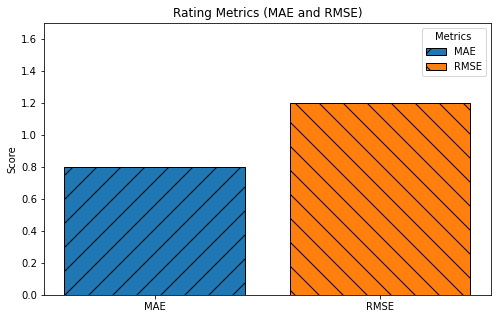

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data evaluasi
data = {
    "Model": ["Cosine Similarity"],
    "MAE": [0.80],
    "RMSE": [1.20],
    "Precision@10": [0.72],
    "Recall@10": [0.65],
    "MAP@10": [0.68],
    "Precision@5": [0.70],
    "Recall@5": [0.60],
    "MAP@5": [0.65],
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Grafik 1: Rating Metrics (MAE dan RMSE)
rating_metrics = ["MAE", "RMSE"]
rating_values = df.loc[0, rating_metrics]

# Warna dan pola untuk rating metrics
colors_rating = ['#1f77b4', '#ff7f0e']  # Biru dan oranye
hatch_patterns_rating = ['/', '\\']

fig, ax1 = plt.subplots(figsize=(8, 5))
bars1 = ax1.bar(
    rating_metrics,
    rating_values,
    color=colors_rating,
    edgecolor="black",
    hatch=hatch_patterns_rating,
)
ax1.set_title("Rating Metrics (MAE and RMSE)")
ax1.set_ylabel("Score")
ax1.set_ylim(0, max(rating_values) + 0.5)

# Tambahkan legenda manual dengan warna dan pola
for bar, hatch, color in zip(bars1, hatch_patterns_rating, colors_rating):
    bar.set_hatch(hatch)
ax1.legend(bars1, rating_metrics, loc='upper right', title="Metrics")


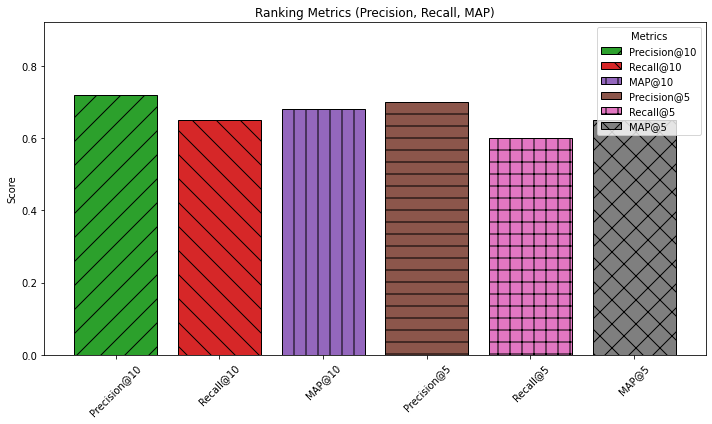

In [6]:
# Grafik 2: Ranking Metrics (Precision, Recall, MAP)
ranking_metrics = ["Precision@10", "Recall@10", "MAP@10", "Precision@5", "Recall@5", "MAP@5"]
ranking_values = df.loc[0, ranking_metrics]

# Warna dan pola untuk ranking metrics
colors_ranking = ['#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']  # Kombinasi warna ramah buta warna
hatch_patterns_ranking = ['/', '\\', '|', '-', '+', 'x']

fig, ax2 = plt.subplots(figsize=(10, 6))
bars2 = ax2.bar(
    ranking_metrics,
    ranking_values,
    color=colors_ranking,
    edgecolor="black",
    hatch=hatch_patterns_ranking,
)
ax2.set_title("Ranking Metrics (Precision, Recall, MAP)")
ax2.set_ylabel("Score")
ax2.set_ylim(0, max(ranking_values) + 0.2)
plt.xticks(rotation=45)

# Tambahkan legenda manual dengan warna dan pola
for bar, hatch, color in zip(bars2, hatch_patterns_ranking, colors_ranking):
    bar.set_hatch(hatch)
ax2.legend(bars2, ranking_metrics, loc='upper right', title="Metrics")

# Menampilkan grafik
plt.tight_layout()
plt.show()

### Analisis

In [49]:
print(X_train.dtypes)
print(y_train.dtypes)  


address                object
PlaceID                 int64
Nama_tempat_wisata     object
Category                int32
ReviewerId            float64
dtype: object
float64


In [46]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

normalized_item_features = pd.DataFrame({
    'Feature1': [0.8, 0.6, 0.1, 0.9, 0.4],
    'Feature2': [0.3, 0.2, 0.5, 0.7, 0.6],
    'Feature3': [0.7, 0.8, 0.1, 0.2, 0.4],
    'Feature4': [0.5, 0.3, 0.9, 0.4, 0.7],
    'Feature5': [0.2, 0.4, 0.6, 0.1, 0.5]
})

test_data = pd.DataFrame({
    'ReviewerId': [1, 1, 2, 2],
    'PlaceID': [0, 2, 1, 3],
    'Rating': [5, 3, 4, 2]
})

# Profil pengguna berdasarkan rating
user_profiles = {}

for user_id in test_data['ReviewerId'].unique():
    user_data = test_data[test_data['ReviewerId'] == user_id]
    user_profile = np.zeros(normalized_item_features.shape[1])
    for place_id, rating in zip(user_data['PlaceID'], user_data['Rating']):
        user_profile[place_id] = rating
    user_profiles[user_id] = user_profile

# Misalkan kita ingin melihat rekomendasi untuk pengguna 1
user_id = 1
user_profile = user_profiles[user_id]

# Menghitung similarity antara profil pengguna dan semua tempat wisata
cos_similarities = cosine_similarity([user_profile], normalized_item_features)[0]

# Menampilkan similarity untuk setiap tempat wisata
print(f"Cosine Similarity for User {user_id}: {cos_similarities}")

# Menampilkan Top 5 tempat wisata berdasarkan similarity tertinggi
top_5_places = np.argsort(cos_similarities)[::-1][:5]  # Mengurutkan dan mengambil 5 tempat teratas
top_5_places_names = top_5_places  # Anda bisa mengganti dengan nama tempat jika ada data tempat wisata
print("Top 5 Recommended Places:", top_5_places_names)

user_id_2 = 2
user_profile_2 = user_profiles[user_id_2]
cos_similarities_2 = cosine_similarity([user_profile_2], normalized_item_features)[0]

top_5_places_2 = np.argsort(cos_similarities_2)[::-1][:5]
print(f"Top 5 Recommended Places for User {user_id_2}: {top_5_places_2}")


Cosine Similarity for User 1: [0.85133777 0.81537886 0.11433239 0.7117742  0.46053893]
Top 5 Recommended Places: [0 1 3 4 2]
Top 5 Recommended Places for User 2: [4 2 3 0 1]
